In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
data=pd.read_csv("Default_Fin.xls")
data

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [3]:
data.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [4]:
data.shape

(10000, 5)

In [5]:
data.isnull().sum()

,0
Index,0
Employed,0
Bank Balance,0
Annual Salary,0
Defaulted?,0


In [6]:
data.duplicated().sum()

0

In [7]:
data['Employed'].unique()

array([1, 0])

In [8]:
table = data['Employed'].value_counts().reset_index()
table.columns = ['Employed', 'Number']
table['Employed'] = table['Employed'].map({1 :'Employed', 0 :'Unemployed'})
table

,Employed,Number
0,Employed,7056
1,Unemployed,2944


In [9]:
fig = px.pie(table,
             values='Number',
             names = 'Employed',
             title='Employment')
fig.show()

In [10]:
data['Bank Balance'].unique()

array([ 8754.36,  9806.16, 12882.6 , ..., 10144.92, 18828.12,  2411.04])

In [11]:
table = data['Bank Balance'].value_counts().reset_index()
table.columns = ['Bank Balance', 'Number']
table

,Bank Balance,Number
0,0.00,499
1,12382.44,3
2,6273.24,3
3,9278.04,3
4,9324.24,3
...,...,...
9222,1327.92,1
9223,5224.80,1
9224,6465.00,1
9225,12005.04,1


In [12]:
table['Bank Balance'] = pd.cut(table['Bank Balance'], bins=5, labels=[1,2,3,4,5])
table['Bank Balance']

,Bank Balance
0,1
1,2
2,1
3,2
4,2
...,...
9222,1
9223,1
9224,2
9225,2


In [13]:
table = table['Bank Balance'].value_counts().reset_index()
table.columns = ['Bank Balance', 'Number']
table['Bank Balance'] = table['Bank Balance'].map({1 :'Low', 2 :'Middle Low', 3:'Fair', 4:'High', 5: "Very High"})
# Sortiranje prema originalnim numeričkim vrednostima
table = table.sort_values('Bank Balance')
table

,Bank Balance,Number
2,Low,2256
0,Middle Low,3868
1,Fair,2452
3,High,599
4,Very High,52


In [14]:
fig = px.pie(table,
             values='Number',
             names = 'Bank Balance',
             title='Bank Balance')
fig.show()

In [15]:
data['Annual Salary'].unique()

array([532339.56, 145273.56, 381205.68, ..., 703633.92, 440029.32,
       202355.4 ])

In [16]:
table = data['Annual Salary'].value_counts().reset_index()
table.columns = ['Annual Salary', 'Number']
table

,Annual Salary,Number
0,231870.60,2
1,142868.16,2
2,230266.92,2
3,670712.76,2
4,577349.76,2
...,...,...
9984,436022.64,1
9985,537026.76,1
9986,505584.12,1
9987,324518.76,1


In [17]:

table = data['Annual Salary'].astype('int').value_counts().reset_index()
table.columns = ['Annual Salary', 'Number']
table

,Annual Salary,Number
0,532339,2
1,186561,2
2,291496,2
3,283617,2
4,486292,2
...,...,...
9902,445722,1
9903,590653,1
9904,179401,1
9905,507982,1


In [18]:
table['Annual Salary'] = pd.cut(table['Annual Salary'], bins=5, labels=[1,2,3,4,5])
table['Annual Salary']

,Annual Salary
0,3
1,2
2,2
3,2
4,3
...,...
9902,3
9903,4
9904,1
9905,3


In [19]:
table = table['Annual Salary'].value_counts().reset_index()
table.columns = ['Annual Salary', 'Number']
table['Annual Salary'] = table['Annual Salary'].map({1 :'Low', 2 :'Middle low', 3:'Fair', 4:'High', 5: "Very high"})
table = table.sort_values('Annual Salary')
table

,Annual Salary,Number
3,Low,878
1,Middle low,3105
0,Fair,3615
2,High,2109
4,Very high,200


In [20]:
fig = px.pie(table,
             values='Number',
             names = 'Annual Salary',
             title='Annual Salary')
fig.show()

In [21]:
table = data['Defaulted?'].value_counts().reset_index()
table.columns = ['Defaulted?', 'Number']
table['Defaulted?'] = table['Defaulted?'].map({0:'Not', 1:'Yes'})
# Sortiranje prema originalnim numeričkim vrijednostima

table

,Defaulted?,Number
0,Not,9667
1,Yes,333


In [22]:
fig = px.pie(table,
             values='Number',
             names = 'Defaulted?',
             title='Defaulted? ')
fig.show()

In [23]:
data.drop(columns=['Index'],inplace=True)
data.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


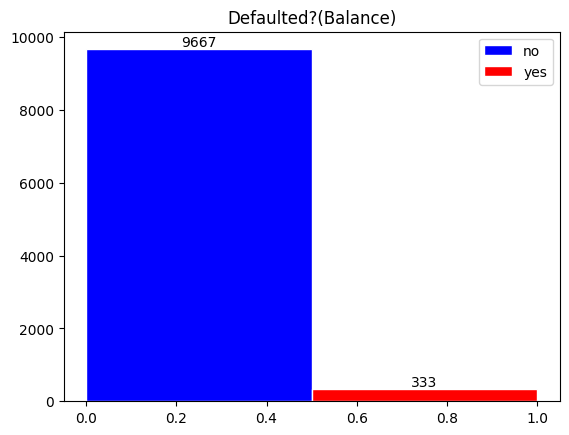

In [24]:
freq,bins,patches = plt.hist(data['Defaulted?'],bins=2, edgecolor="white")
colors=["blue","red"]
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)
bin_centers=np.diff(bins)*0.5+bins[:-1]
for fr,p in zip (freq,bin_centers):
  height = int(fr)
  plt.annotate("{}".format(height),xy=(p,height),xytext=(0,0.2),textcoords="offset points",ha="center",va="bottom")
labels = ["no", "yes"]
for patch, label in zip(patches, labels):
    patch.set_label(label)
plt.legend()
plt.title("Defaulted?(Balance)")
plt.show()

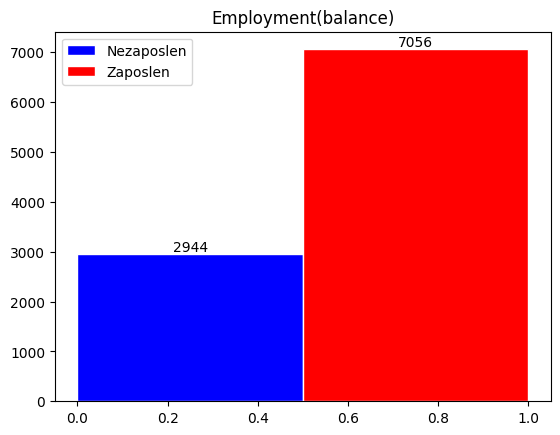

In [25]:
freq,bins,patches = plt.hist(data['Employed'],bins=2, edgecolor="white")
colors=["blue","red"]
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)
bin_centers=np.diff(bins)*0.5+bins[:-1]
for fr,p in zip (freq,bin_centers):
  height = int(fr)
  plt.annotate("{}".format(height),xy=(p,height),xytext=(0,0.2),textcoords="offset points",ha="center",va="bottom")
labels = ["Nezaposlen","Zaposlen"]
for patch, label in zip(patches, labels):
    patch.set_label(label)
plt.legend()
plt.title("Employment(balance)")
plt.show()

In [26]:
data.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [27]:
table=data.copy()
table['Employed'] = table['Employed'].map({0 :'Unemployed', 1 :'Employed'})
table['Defaulted?'] = table['Defaulted?'].map({0 :'no', 1 :'yes'})

In [28]:
table

,Employed,Bank Balance,Annual Salary,Defaulted?
0,Employed,8754.36,532339.56,no
1,Unemployed,9806.16,145273.56,no
2,Employed,12882.60,381205.68,no
3,Employed,6351.00,428453.88,no
4,Employed,9427.92,461562.00,no
...,...,...,...,...
9995,Employed,8538.72,635908.56,no
9996,Employed,9095.52,235928.64,no
9997,Employed,10144.92,703633.92,no
9998,Employed,18828.12,440029.32,no


In [29]:
fig = px.sunburst(table,
                  path=['Employed','Defaulted?'],
                  title='Default related with Employed')
fig.show()

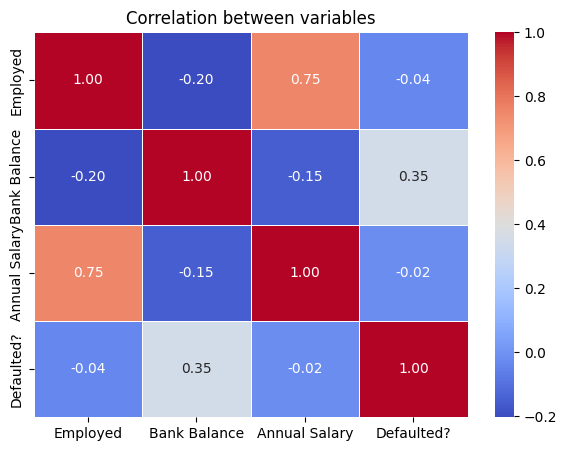

In [30]:
korelacija = data.corr()

# Kreiranje toplotne mape koristeći Seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(korelacija, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Prikazivanje grafikona
plt.title('Correlation between variables')
plt.show()


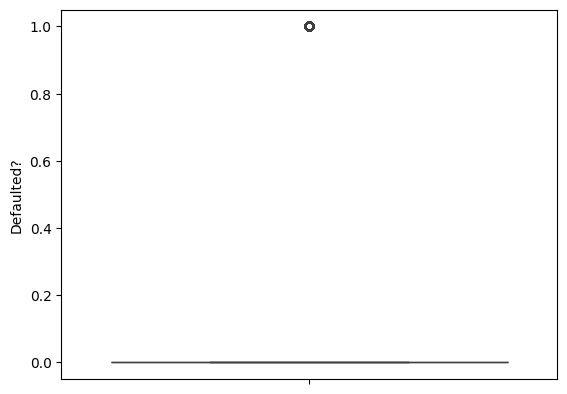

In [31]:
sns.boxplot(data=data['Defaulted?'])
plt.show()

In [32]:
# from scipy import stats
# z_scores = stats.zscore(data['Bank Balance'])
# outliers = data[abs(z_scores) > 3]  # Outlajeri su vrednosti koje imaju Z-score veći od 3 ili manji od -3
# outliers

In [33]:
# from scipy import stats
# import numpy as np

# # Izračunavanje Z-skorova
# z_scores = stats.zscore(data['Bank Balance'])

# # Definišemo prag za outlajere (Z-skor > 3 ili Z-skor < -3)
# threshold = 3

# # Srednja vrednost kolone
# mean_value = data['Bank Balance'].mean()

# # Zamenjujemo outlajere srednjom vrednošću
# data['Bank Balance'] = np.where(abs(z_scores) > threshold, mean_value, data['Bank Balance'])


In [34]:
# z_scores = stats.zscore(data['Bank Balance'])
# outliers = data[abs(z_scores) > 3]  # Outlajeri su vrednosti koje imaju Z-score veći od 3 ili manji od -3
# outliers

In [35]:
# # Izračunavanje Z-skorova
# z_scores = stats.zscore(data['Bank Balance'])

# # Definišemo prag za outlajere (Z-skor > 3 ili Z-skor < -3)
# threshold = 3

# # Srednja vrednost kolone
# mean_value = data['Bank Balance'].mean()

# # Zamenjujemo outlajere srednjom vrednošću
# data['Bank Balance'] = np.where(abs(z_scores) > threshold, mean_value, data['Bank Balance'])


In [36]:
# z_scores = stats.zscore(data['Bank Balance'])
# outliers = data[abs(z_scores) > 3]  # Outlajeri su vrednosti koje imaju Z-score veći od 3 ili manji od -3
# outliers

In [37]:
# from scipy import stats
# z_scores = stats.zscore(data['Annual Salary'])
# outliers = data[abs(z_scores) > 3]  # Outlajeri su vrednosti koje imaju Z-score veći od 3 ili manji od -3
# outliers

In [38]:
# from scipy import stats
# import numpy as np

# # Izračunavanje Z-skorova
# z_scores = stats.zscore(data['Annual Salary'])

# # Definišemo prag za outlajere (Z-skor > 3 ili Z-skor < -3)
# threshold = 3

# # Srednja vrednost kolone
# mean_value = data['Annual Salary'].mean()

# # Zamenjujemo outlajere srednjom vrednošću
# data['Annual Salary'] = np.where(abs(z_scores) > threshold, mean_value, data['Annual Salary'])


In [39]:
# z_scores = stats.zscore(data['Annual Salary'])
# outliers = data[abs(z_scores) > 3]  # Outlajeri su vrednosti koje imaju Z-score veći od 3 ili manji od -3
# outliers

In [40]:
# from scipy import stats
# z_scores = stats.zscore(data['Employed'])
# outliers = data[abs(z_scores) > 3]  # Outlajeri su vrednosti koje imaju Z-score veći od 3 ili manji od -3
# outliers

In [41]:
features = data.columns[:-1]
features

Index(['Employed', 'Bank Balance', 'Annual Salary'], dtype='object')

In [42]:
x=data[data.columns[:-1]]
x

,Employed,Bank Balance,Annual Salary
0,1,8754.36,532339.56
1,0,9806.16,145273.56
2,1,12882.60,381205.68
3,1,6351.00,428453.88
4,1,9427.92,461562.00
...,...,...,...
9995,1,8538.72,635908.56
9996,1,9095.52,235928.64
9997,1,10144.92,703633.92
9998,1,18828.12,440029.32


In [43]:
y=data['Defaulted?']
y

,Defaulted?
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41,stratify=y)

In [45]:
#standardizacija

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[1.        , 0.41973839, 0.54392375],
       [1.        , 0.71189608, 0.6620322 ],
       [1.        , 0.34489436, 0.4549981 ],
       ...,
       [1.        , 0.65482308, 0.52278756],
       [1.        , 0.4407984 , 0.65501195],
       [0.        , 0.42679104, 0.20514697]])

In [47]:
#unsampling by smote
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority',random_state=42)
smote.fit(x_train,y_train)
x_train,y_train = smote.fit_resample(x_train,y_train)


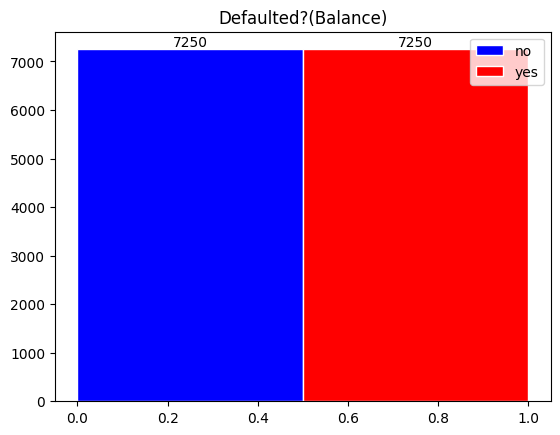

In [48]:
freq,bins,patches = plt.hist(y_train,bins=2, edgecolor="white")
colors=["blue","red"]
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)
bin_centers=np.diff(bins)*0.5+bins[:-1]
for fr,p in zip (freq,bin_centers):
  height = int(fr)
  plt.annotate("{}".format(height),xy=(p,height),xytext=(0,0.2),textcoords="offset points",ha="center",va="bottom")
labels = ["no", "yes"]
for patch, label in zip(patches, labels):
    patch.set_label(label)
plt.legend()
plt.title("Defaulted?(Balance)")
plt.show()

In [49]:
pd.DataFrame(x_train,columns=features)

,Employed,Bank Balance,Annual Salary
0,1.0,0.419738,0.543924
1,1.0,0.711896,0.662032
2,1.0,0.344894,0.454998
3,1.0,0.644772,0.525509
4,0.0,0.400076,0.244808
...,...,...,...
14495,1.0,0.758883,0.679524
14496,0.0,0.442878,0.208094
14497,0.0,0.790077,0.244028
14498,0.0,0.657824,0.191894


In [50]:
y_train = pd.DataFrame(y_train,columns=["Defaulted?"])
y_train

,Defaulted?
0,0
1,1
2,0
3,0
4,0
...,...
14495,1
14496,1
14497,1
14498,1


In [51]:
x_train.shape

(14500, 3)

In [52]:
y_train.shape

(14500, 1)

In [53]:
x_test.shape

(2500, 3)

In [54]:
y_test

,Defaulted?
8014,0
8155,0
1523,0
8114,0
900,0
...,...
5295,0
4496,0
8516,0
1089,0


In [55]:
y_test.unique()

array([0, 1])

In [56]:
#metode

In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def report(model, text, x, y):
    print(text)
    y_pred = model.predict(x)
    print("Classification report:")
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    print("Confusion_matrix:")
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y,y_pred),columns=['0','1'], index=['0','1']))
    print("---------------------------------------------------------------------------------")
    print("Accuracy:")
    print("---------------------------------------------------------------------------------")
    print(accuracy_score(y,y_pred))
    print("---------------------------------------------------------------------------------")
    print("Precision:")
    print("---------------------------------------------------------------------------------")
    print(precision_score(y,y_pred))
    print("---------------------------------------------------------------------------------")
    print("Recall:")
    print("---------------------------------------------------------------------------------")
    print(recall_score(y,y_pred))
    print("---------------------------------------------------------------------------------")
    print("F1 score:")
    print("---------------------------------------------------------------------------------")
    print(f1_score(y,y_pred))
    print("---------------------------------------------------------------------------------")





In [58]:
from sklearn.model_selection import GridSearchCV


In [59]:
paramsss = {
     'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
     'penalty' :['l2',None]

}

In [60]:

from sklearn.linear_model import LogisticRegression
logistic_reg_best = GridSearchCV(LogisticRegression(),param_grid=paramsss)
logistic_reg_best.fit(x_train,y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l2', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [61]:
logistic_reg_best.best_params_

{'penalty': 'l2', 'solver': 'lbfgs'}

In [62]:
report(logistic_reg_best.best_estimator_,"Train set",x_train,y_train)

Train set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7250
           1       0.88      0.91      0.89      7250

    accuracy                           0.89     14500
   macro avg       0.89      0.89      0.89     14500
weighted avg       0.89      0.89      0.89     14500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0     1
0  6318   932
1   681  6569
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.8887586206896552
---------------------------------------------------------------------------------
Precision:
------------------------------------------------

In [63]:
report(logistic_reg_best.best_estimator_,"Test set",x_test,y_test)

Test set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      2417
           1       0.19      0.88      0.32        83

    accuracy                           0.87      2500
   macro avg       0.59      0.88      0.62      2500
weighted avg       0.97      0.87      0.91      2500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0    1
0  2111  306
1    10   73
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.8736
---------------------------------------------------------------------------------
Precision:
----------------------------------------------------------------

In [64]:
logistic_reg11 = LogisticRegression(solver= 'lbfgs')
logistic_reg11.fit(x_train,y_train)
report(logistic_reg11,"Train set",x_train,y_train)

Train set
Classification report:
---------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7250
           1       0.88      0.91      0.89      7250

    accuracy                           0.89     14500
   macro avg       0.89      0.89      0.89     14500
weighted avg       0.89      0.89      0.89     14500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0     1
0  6318   932
1   681  6569
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.8887586206896552
---------------------------------------------------------------------------------
Precision:
---------------------------------------------------------------------------------
0.8757499000133315
--------------------------------------------------------------

In [65]:
report(logistic_reg11,"Test set",x_test,y_test)

Test set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      2417
           1       0.19      0.88      0.32        83

    accuracy                           0.87      2500
   macro avg       0.59      0.88      0.62      2500
weighted avg       0.97      0.87      0.91      2500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0    1
0  2111  306
1    10   73
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.8736
---------------------------------------------------------------------------------
Precision:
----------------------------------------------------------------

In [66]:
logistic_reg1 = LogisticRegression(solver= 'liblinear')
logistic_reg1.fit(x_train,y_train)
report(logistic_reg1,"Train set",x_train,y_train)

Train set
Classification report:
---------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7250
           1       0.88      0.91      0.89      7250

    accuracy                           0.89     14500
   macro avg       0.89      0.89      0.89     14500
weighted avg       0.89      0.89      0.89     14500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0     1
0  6314   936
1   680  6570
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.888551724137931
---------------------------------------------------------------------------------
Precision:
---------------------------------------------------------------------------------
0.8752997601918465
---------------------------------------------------------------

In [67]:
report(logistic_reg1,"Test set",x_test,y_test)

Test set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      2417
           1       0.19      0.88      0.31        83

    accuracy                           0.87      2500
   macro avg       0.59      0.88      0.62      2500
weighted avg       0.97      0.87      0.91      2500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0    1
0  2106  311
1    10   73
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.8716
---------------------------------------------------------------------------------
Precision:
----------------------------------------------------------------

In [68]:
logistic_reg2 = LogisticRegression(solver='newton-cg')
logistic_reg2.fit(x_train,y_train)
report(logistic_reg2,"Train set",x_train,y_train)

Train set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7250
           1       0.88      0.91      0.89      7250

    accuracy                           0.89     14500
   macro avg       0.89      0.89      0.89     14500
weighted avg       0.89      0.89      0.89     14500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0     1
0  6318   932
1   680  6570
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.8888275862068965
---------------------------------------------------------------------------------
Precision:
------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [69]:
report(logistic_reg2,"Test set",x_test,y_test)

Test set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      2417
           1       0.19      0.88      0.32        83

    accuracy                           0.87      2500
   macro avg       0.59      0.88      0.62      2500
weighted avg       0.97      0.87      0.91      2500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0    1
0  2110  307
1    10   73
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.8732
---------------------------------------------------------------------------------
Precision:
----------------------------------------------------------------

In [70]:
logistic_reg3 = LogisticRegression(solver='newton-cholesky')
logistic_reg3.fit(x_train,y_train)
report(logistic_reg3,"Train set",x_train,y_train)

Train set
Classification report:
---------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7250
           1       0.88      0.91      0.89      7250

    accuracy                           0.89     14500
   macro avg       0.89      0.89      0.89     14500
weighted avg       0.89      0.89      0.89     14500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0     1
0  6318   932
1   681  6569
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.8887586206896552
---------------------------------------------------------------------------------
Precision:
---------------------------------------------------------------------------------
0.8757499000133315
--------------------------------------------------------------

In [71]:
report(logistic_reg3,"Test set",x_test,y_test)


Test set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      2417
           1       0.19      0.88      0.32        83

    accuracy                           0.87      2500
   macro avg       0.59      0.88      0.62      2500
weighted avg       0.97      0.87      0.91      2500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0    1
0  2110  307
1    10   73
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.8732
---------------------------------------------------------------------------------
Precision:
----------------------------------------------------------------

In [72]:
logistic_reg4 = LogisticRegression(solver='sag')
logistic_reg4.fit(x_train,y_train)
report(logistic_reg4,"Train set",x_train,y_train)

Train set
Classification report:
---------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7250
           1       0.88      0.91      0.89      7250

    accuracy                           0.89     14500
   macro avg       0.89      0.89      0.89     14500
weighted avg       0.89      0.89      0.89     14500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0     1
0  6318   932
1   679  6571
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.888896551724138
---------------------------------------------------------------------------------
Precision:
---------------------------------------------------------------------------------
0.8757830201252832
---------------------------------------------------------------

In [73]:
report(logistic_reg4,"Test set",x_test,y_test)

Test set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      2417
           1       0.19      0.88      0.32        83

    accuracy                           0.87      2500
   macro avg       0.59      0.88      0.62      2500
weighted avg       0.97      0.87      0.91      2500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0    1
0  2110  307
1    10   73
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.8732
---------------------------------------------------------------------------------
Precision:
----------------------------------------------------------------

In [74]:
logistic_reg5 = LogisticRegression(solver='saga')
logistic_reg5.fit(x_train,y_train)
report(logistic_reg5,"Train set",x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Train set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7250
           1       0.88      0.91      0.89      7250

    accuracy                           0.89     14500
   macro avg       0.89      0.89      0.89     14500
weighted avg       0.89      0.89      0.89     14500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0     1
0  6318   932
1   679  6571
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.888896551724138
---------------------------------------------------------------------------------
Precision:
-------------------------------------------------

In [75]:
report(logistic_reg5,"Test set",x_test,y_test)

Test set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      2417
           1       0.19      0.88      0.32        83

    accuracy                           0.87      2500
   macro avg       0.59      0.88      0.62      2500
weighted avg       0.97      0.87      0.91      2500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0    1
0  2110  307
1    10   73
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.8732
---------------------------------------------------------------------------------
Precision:
----------------------------------------------------------------

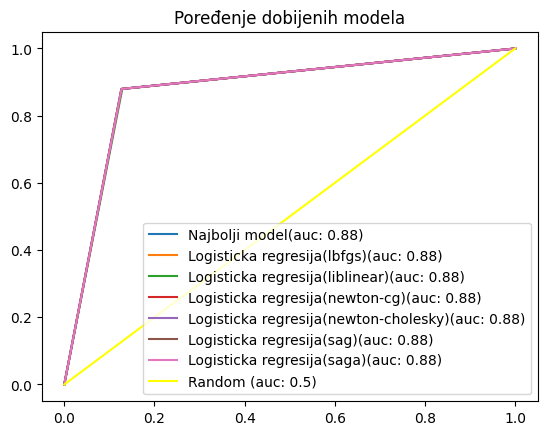

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [logistic_reg_best.best_estimator_,logistic_reg11,logistic_reg1,logistic_reg2,logistic_reg3,logistic_reg4,logistic_reg5]
model_names = ["Najbolji model","Logisticka regresija(lbfgs)","Logisticka regresija(liblinear)","Logisticka regresija(newton-cg)","Logisticka regresija(newton-cholesky)","Logisticka regresija(sag)","Logisticka regresija(saga)"]
for model, model_name in zip(models, model_names):
    y_pred = model.predict(x_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='yellow')
plt.title("Poređenje dobijenih modela")
plt.legend()
plt.show()

In [77]:
def plot_decision_tree(model, feature_names):
    plt.figure()
    plot_tree(model, class_names=['0', '1'], feature_names=feature_names, filled=True)
    plt.title("Decision tree of depth {} with {} nodes".format(model.get_depth(), model.get_n_leaves()))
    plt.show()


Train set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7250
           1       0.93      0.95      0.94      7250

    accuracy                           0.94     14500
   macro avg       0.94      0.94      0.94     14500
weighted avg       0.94      0.94      0.94     14500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0     1
0  6763   487
1   369  6881
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.9409655172413793
---------------------------------------------------------------------------------
Precision:
------------------------------------------------

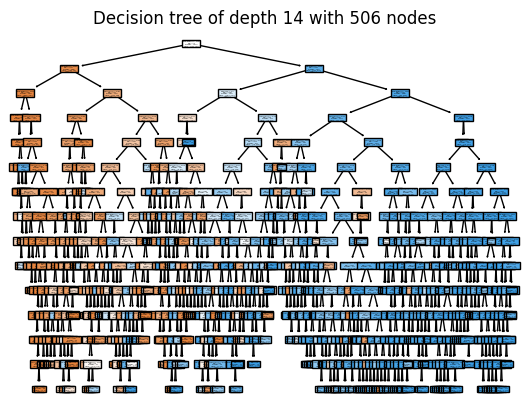

In [78]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini', 'entropy','log_loss'],
          'max_depth': [2, 4, 6, 8, 10,12,14,16,18,20],
          'min_samples_split': [2,3,4,5,6],
          'min_samples_leaf' : [2,3,4,5,6,7]
         }
estimator = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=3)
estimator.fit(x_train, y_train)
report(estimator.best_estimator_,"Train set",x_train,y_train)
plot_decision_tree(estimator.best_estimator_, features)

In [79]:
estimator.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'min_samples_leaf': 7,
 'min_samples_split': 5}

In [80]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strat

In [81]:
report(estimator.best_estimator_,"Test set",x_test,y_test)


Test set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2417
           1       0.21      0.70      0.32        83

    accuracy                           0.90      2500
   macro avg       0.60      0.80      0.63      2500
weighted avg       0.96      0.90      0.93      2500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0    1
0  2195  222
1    25   58
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.9012
---------------------------------------------------------------------------------
Precision:
----------------------------------------------------------------

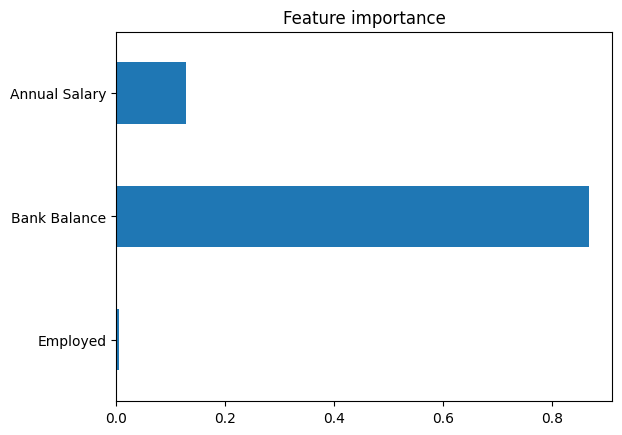

In [82]:
pd.Series(estimator.best_estimator_.feature_importances_, index=x.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [83]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc1 = DecisionTreeClassifier(criterion="entropy")
dtc1.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [84]:
report(dtc1,"Train set",x_train,y_train)

Train set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7250
           1       1.00      1.00      1.00      7250

    accuracy                           1.00     14500
   macro avg       1.00      1.00      1.00     14500
weighted avg       1.00      1.00      1.00     14500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0     1
0  7250     0
1     0  7250
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
1.0
---------------------------------------------------------------------------------
Precision:
---------------------------------------------------------------

In [85]:
report(dtc1,"Test set",x_test,y_test)

Test set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2417
           1       0.18      0.69      0.28        83

    accuracy                           0.88      2500
   macro avg       0.58      0.79      0.61      2500
weighted avg       0.96      0.88      0.91      2500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0    1
0  2152  265
1    26   57
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.8836
---------------------------------------------------------------------------------
Precision:
----------------------------------------------------------------

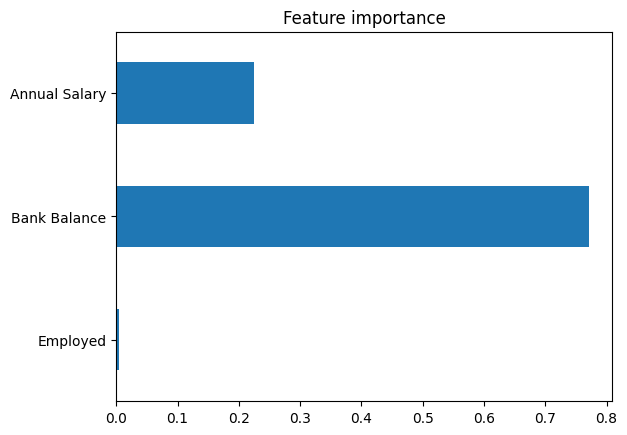

In [86]:
pd.Series(dtc1.feature_importances_, index=x.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [87]:
dtc2 = DecisionTreeClassifier(criterion="gini")
dtc2.fit(x_train, y_train)
#plot_decision_tree(dtc2, features)

DecisionTreeClassifier()

In [88]:
report(dtc2,"Train set",x_train,y_train)

Train set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7250
           1       1.00      1.00      1.00      7250

    accuracy                           1.00     14500
   macro avg       1.00      1.00      1.00     14500
weighted avg       1.00      1.00      1.00     14500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0     1
0  7250     0
1     0  7250
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
1.0
---------------------------------------------------------------------------------
Precision:
---------------------------------------------------------------

In [89]:
report(dtc2,"Test set",x_test,y_test)

Test set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      2417
           1       0.18      0.65      0.28        83

    accuracy                           0.89      2500
   macro avg       0.58      0.77      0.61      2500
weighted avg       0.96      0.89      0.92      2500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0    1
0  2167  250
1    29   54
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.8884
---------------------------------------------------------------------------------
Precision:
----------------------------------------------------------------

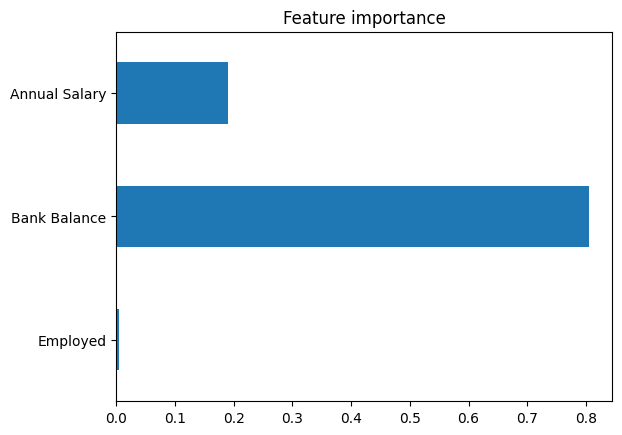

In [90]:
pd.Series(dtc2.feature_importances_, index=x.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [91]:
dtc3 = DecisionTreeClassifier(criterion="log_loss")
dtc3.fit(x_train, y_train)
report(dtc3,"Train set",x_train,y_train)

Train set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7250
           1       1.00      1.00      1.00      7250

    accuracy                           1.00     14500
   macro avg       1.00      1.00      1.00     14500
weighted avg       1.00      1.00      1.00     14500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0     1
0  7250     0
1     0  7250
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
1.0
---------------------------------------------------------------------------------
Precision:
---------------------------------------------------------------

In [92]:
report(dtc3,"Test set",x_test,y_test)

Test set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2417
           1       0.18      0.70      0.29        83

    accuracy                           0.88      2500
   macro avg       0.58      0.79      0.61      2500
weighted avg       0.96      0.88      0.92      2500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0    1
0  2153  264
1    25   58
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.8844
---------------------------------------------------------------------------------
Precision:
----------------------------------------------------------------

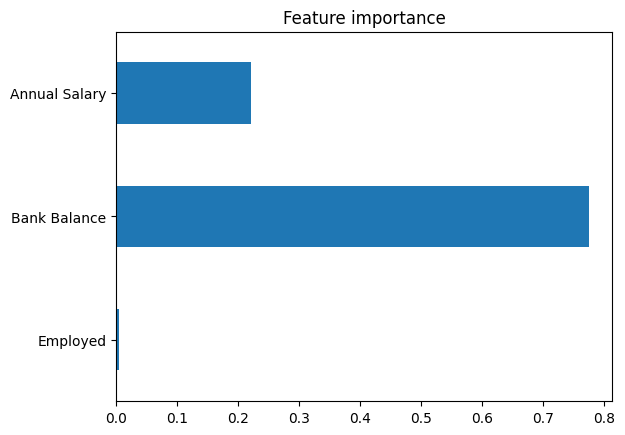

In [93]:
pd.Series(dtc3.feature_importances_, index=x.columns).plot.barh()
plt.title("Feature importance")
plt.show()

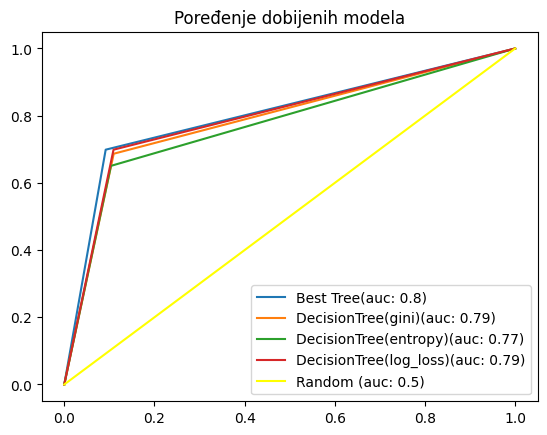

In [94]:
models = [estimator.best_estimator_,dtc1,dtc2,dtc3]
model_names = ["Best Tree","DecisionTree(gini)","DecisionTree(entropy)","DecisionTree(log_loss)"]
for model, model_name in zip(models, model_names):
    y_pred = model.predict(x_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='yellow')
plt.title("Poređenje dobijenih modela")
plt.legend()
plt.show()

In [95]:
results = estimator.cv_results_

# Kreiranje DataFrame-a sa svim rezultatima
scores_df = pd.DataFrame(results)

# Predikcija za test set (X_test) za sve parametre
y_pred_all = []
for params in scores_df['params']:
    model = DecisionTreeClassifier(**params)
    model.fit(x_train, y_train)
    y_pred_all.append(model.predict(x_test))

# Dodavanje metrika za svaki model
scores_df['accuracy'] = [accuracy_score(y_test, y_pred) for y_pred in y_pred_all]
scores_df['precision'] = [precision_score(y_test, y_pred, average='binary') for y_pred in y_pred_all]
scores_df['recall'] = [recall_score(y_test, y_pred, average='binary') for y_pred in y_pred_all]
scores_df['f1'] = [f1_score(y_test, y_pred, average='binary') for y_pred in y_pred_all]

# Finalni DataFrame sa svim relevantnim informacijama
final_results = scores_df[['params', 'mean_test_score', 'accuracy', 'precision', 'recall', 'f1']]

# Prikazivanje finalnih rezultata
final_results

,params,mean_test_score,accuracy,precision,recall,f1
0,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.885448,0.8408,0.161290,0.903614,0.273723
1,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.885448,0.8408,0.161290,0.903614,0.273723
2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.885448,0.8408,0.161290,0.903614,0.273723
3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.885448,0.8408,0.161290,0.903614,0.273723
4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.885448,0.8408,0.161290,0.903614,0.273723
...,...,...,...,...,...,...
895,"{'criterion': 'log_loss', 'max_depth': 20, 'mi...",0.904965,0.8928,0.194719,0.710843,0.305699
896,"{'criterion': 'log_loss', 'max_depth': 20, 'mi...",0.904896,0.8936,0.196013,0.710843,0.307292
897,"{'criterion': 'log_loss', 'max_depth': 20, 'mi...",0.905034,0.8932,0.195364,0.710843,0.306494
898,"{'criterion': 'log_loss', 'max_depth': 20, 'mi...",0.905034,0.8932,0.195364,0.710843,0.306494


In [96]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

paramss = {
    'criterion' : ["gini", "entropy", "log_loss"],
    'n_estimators': [90, 100, 120],

}

In [97]:
rf1=GridSearchCV(RandomForestClassifier(),param_grid=paramss)
rf1.fit(x_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [90, 100, 120]})

In [98]:
rf1.best_params_

{'criterion': 'gini', 'n_estimators': 120}

In [99]:

report(rf1.best_estimator_,"Train set",x_train,y_train)

Train set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7250
           1       1.00      1.00      1.00      7250

    accuracy                           1.00     14500
   macro avg       1.00      1.00      1.00     14500
weighted avg       1.00      1.00      1.00     14500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0     1
0  7250     0
1     1  7249
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.9999310344827587
---------------------------------------------------------------------------------
Precision:
------------------------------------------------

In [100]:
rf1.best_params_

{'criterion': 'gini', 'n_estimators': 120}

In [101]:
report(rf1.best_estimator_,"Test set",x_test,y_test)


Test set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2417
           1       0.22      0.72      0.34        83

    accuracy                           0.91      2500
   macro avg       0.61      0.82      0.65      2500
weighted avg       0.96      0.91      0.93      2500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0    1
0  2209  208
1    23   60
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.9076
---------------------------------------------------------------------------------
Precision:
----------------------------------------------------------------

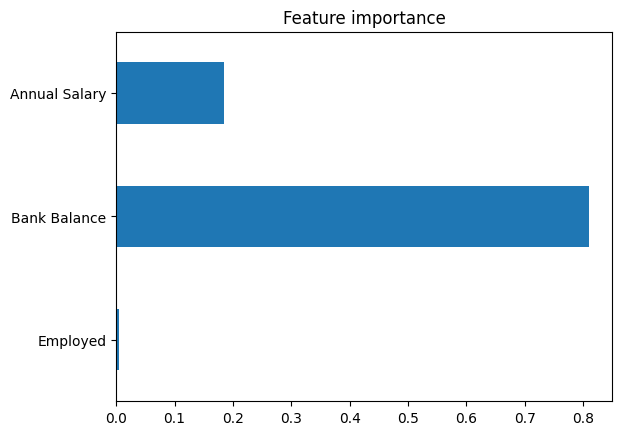

In [102]:
pd.Series(rf1.best_estimator_.feature_importances_, index=x.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [103]:
rf2 = RandomForestClassifier(criterion='gini')
rf2.fit(x_train,y_train)
report(rf2,"Train set",x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Train set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7250
           1       1.00      1.00      1.00      7250

    accuracy                           1.00     14500
   macro avg       1.00      1.00      1.00     14500
weighted avg       1.00      1.00      1.00     14500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0     1
0  7250     0
1     0  7250
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
1.0
---------------------------------------------------------------------------------
Precision:
---------------------------------------------------------------

In [104]:
report(rf2,"Test set",x_test,y_test)

Test set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2417
           1       0.22      0.71      0.33        83

    accuracy                           0.91      2500
   macro avg       0.60      0.81      0.64      2500
weighted avg       0.96      0.91      0.93      2500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0    1
0  2205  212
1    24   59
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.9056
---------------------------------------------------------------------------------
Precision:
----------------------------------------------------------------

In [105]:
rf3 = RandomForestClassifier(criterion='log_loss')
rf3.fit(x_train,y_train)
report(rf3,"Train set",x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Train set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7250
           1       1.00      1.00      1.00      7250

    accuracy                           1.00     14500
   macro avg       1.00      1.00      1.00     14500
weighted avg       1.00      1.00      1.00     14500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0     1
0  7250     0
1     0  7250
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
1.0
---------------------------------------------------------------------------------
Precision:
---------------------------------------------------------------

In [106]:
report(rf3,"Test set",x_test,y_test)

Test set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2417
           1       0.23      0.72      0.35        83

    accuracy                           0.91      2500
   macro avg       0.61      0.82      0.65      2500
weighted avg       0.96      0.91      0.93      2500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0    1
0  2213  204
1    23   60
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.9092
---------------------------------------------------------------------------------
Precision:
----------------------------------------------------------------

In [107]:
rf4 = RandomForestClassifier(criterion='entropy')
rf4.fit(x_train,y_train)
report(rf4,"Train set",x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Train set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7250
           1       1.00      1.00      1.00      7250

    accuracy                           1.00     14500
   macro avg       1.00      1.00      1.00     14500
weighted avg       1.00      1.00      1.00     14500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0     1
0  7249     1
1     0  7250
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.9999310344827587
---------------------------------------------------------------------------------
Precision:
------------------------------------------------

In [108]:
report(rf4,"Test set",x_test,y_test)

Test set
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2417
           1       0.21      0.71      0.33        83

    accuracy                           0.90      2500
   macro avg       0.60      0.81      0.64      2500
weighted avg       0.96      0.90      0.93      2500

---------------------------------------------------------------------------------
Confusion_matrix:
---------------------------------------------------------------------------------
      0    1
0  2200  217
1    24   59
---------------------------------------------------------------------------------
Accuracy:
---------------------------------------------------------------------------------
0.9036
---------------------------------------------------------------------------------
Precision:
----------------------------------------------------------------

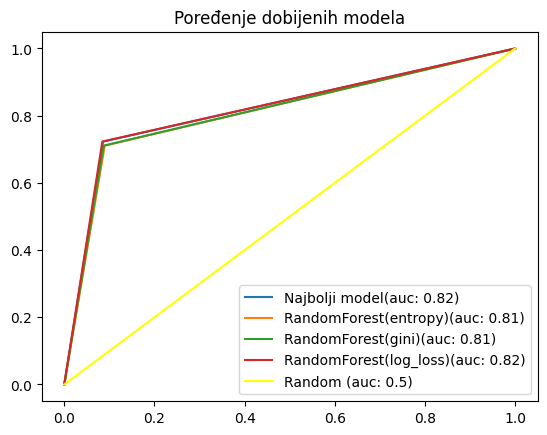

In [109]:
models = [rf1,rf4,rf2,rf3]
model_names = ["Najbolji model","RandomForest(entropy)","RandomForest(gini)","RandomForest(log_loss)"]
for model, model_name in zip(models, model_names):
    y_pred = model.predict(x_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='yellow')
plt.title("Poređenje dobijenih modela")
plt.legend()
plt.show()